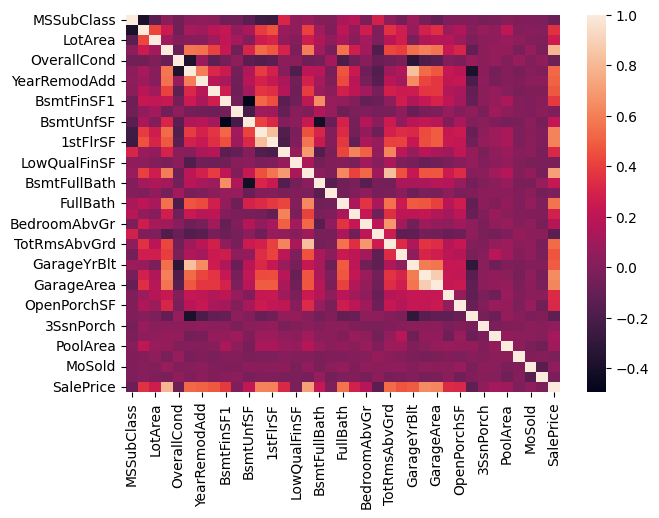

MSSubClass         0
MSZoning           4
LotFrontage      483
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


0       6
1       6
2       3
3       6
4       1
       ..
2906    8
2907    2
2908    5
2909    4
2910    6
Name: MoSold, Length: 2911, dtype: object

In [11]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, LogisticRegression, ARDRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score 
import math
import seaborn as sns
from sklearn.ensemble import StackingRegressor


pd.set_option('use_inf_as_na',True)

data_train = pd.read_csv("D:\\Magang\\trainH.csv")
data_test = pd.read_csv("D:\\Magang\\testH.csv")

#RemoveColumnID
data_test.drop('Id', axis=1, inplace=True)
data_train.drop('Id', axis=1, inplace=True)

#Grafik Korelasi
sns.heatmap(data_train.corr())
plt.show()

#Normal Distribution
data_train['SalePrice'] = np.log10(data_train['SalePrice'])

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Histogram
#x = np.array(data_train["SalePrice"])
#plt.hist(x, bins=50)
#plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

#Outlier Drop

data_train = data_train[data_train["TotalBsmtSF"] < 4000]
data_train = data_train[data_train["LotArea"] < 100000]
data_train = data_train[data_train["GrLivArea"] < 4000]

#find how many rows are left in the dataframe 
#print(data_train.shape)

#Append data
sale = np.zeros_like(1459)
data_test = data_test.assign(SalePrice=sale)
data_campuran = data_test.append(data_train, ignore_index=True, sort=False)
#print(df)

#Null
print(data_campuran.isnull().sum())

#Ubah Tipe Data
data_campuran['MSSubClass'].astype(str)
data_campuran['YrSold'].astype(str)
data_campuran['MoSold'].astype(str)


(1140, 76)


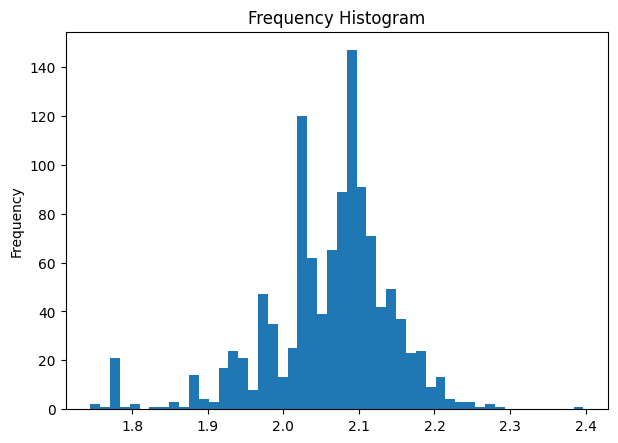

Ukuran dari Data Test adalah (562, 76)
Ukuran dari Data Training adalah (578, 58)


In [12]:

#Drop Null
data_campuran.drop('Alley', axis=1, inplace=True)
data_campuran.drop('PoolQC', axis=1, inplace=True)
data_campuran.drop('Fence', axis=1, inplace=True)
data_campuran.drop('MiscFeature', axis=1, inplace=True)

data_campuran = data_campuran.dropna()
print(data_campuran.shape)

#Feature Transformation

# Histogram


#Untuk yang logaritmik


data_campuran[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 
'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea', 
'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr', 
'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF', 
'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd']] = data_campuran[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 
'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea', 
'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr', 
'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF', 
'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd']].transform(func = 'log')

data_campuran[['YearRemodAdd','LotFrontage', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
'GrLivArea', 'GarageCars', 'GarageArea']] = data_campuran[['YearRemodAdd','LotFrontage', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
'GrLivArea', 'GarageCars', 'GarageArea']].transform(func = 'sqrt')

x = np.array(data_campuran["LotFrontage"])
plt.hist(x, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.title = "Distribusi LotFrontage"
plt.show()

#Splitting antara Training data dan Test data
data_training_f = data_campuran[data_campuran['SalePrice'] != 0]
data_test_f = data_campuran[data_campuran['SalePrice'] == 0]

#Drop Kolom yang punya data NaN
data_training_f=data_training_f.dropna(axis=1)

print("Ukuran dari Data Test adalah" + " " + str(data_test_f.shape))
print("Ukuran dari Data Training adalah" + " " + str(data_training_f.shape))



In [13]:
#Dipakai parameter numerik yang tidak mengandung nilai -inf atau NaN
x1 = data_training_f.loc[:,['LotFrontage','LotArea','TotalBsmtSF','1stFlrSF','GrLivArea','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','YearRemodAdd']]
y1 = data_training_f.loc[:,'SalePrice']

x_test = data_test_f.loc[:,['LotFrontage','LotArea','TotalBsmtSF','1stFlrSF','GrLivArea','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','YearRemodAdd']]

y_validation = y1[:231].to_numpy()
x_validation = x1[:231].to_numpy()
x_train = x1[232:562].to_numpy()
y_train = y1[232:562].to_numpy()

#Model Pertama
reg1 = LinearRegression()
reg1.fit(x_train, y_train)
dg = reg1.predict(x_validation)

mse = mean_squared_error(y_validation, dg)
rmse = math.sqrt(mse)
print('RMSE Linear: %f' % rmse)


#Model Kedua
reg2 = LinearSVR(random_state=42)
reg2.fit(x_train, y_train)
dg2 = reg2.predict(x_validation)

mse2 = mean_squared_error(y_validation, dg2)
rmse2 = math.sqrt(mse2)
print('RMSE SVR: %f' % rmse2)

#Model Ketiga
reg3 = ARDRegression()
reg3.fit(x_train, y_train)
dg3 = reg3.predict(x_validation)

mse3 = mean_squared_error(y_validation, dg3)
rmse3 = math.sqrt(mse3)
print('RMSE ARD: %f' % rmse3)

#Model Gabungan
estimators = [('lr', LinearRegression()),('svr', LinearSVR(random_state=1))]

reg4 = StackingRegressor(estimators=estimators,final_estimator=ARDRegression()) 
reg4.fit(x_train, y_train)
dg4 = reg4.predict(x_validation)

mse4 = mean_squared_error(y_validation, dg4)
rmse4 = math.sqrt(mse4)
print('RMSE Gabungan: %f' % rmse4)

#Plotting untuk masing masing model
y = [rmse,rmse2,rmse3,rmse4]
x = ["Linear", "SVR", "ARD", "Gabungan"]
#plt.bar(x,y)
#plt.title("Nilai RMSE")
#plt.show()

#Prediksi
dgprediksi = reg4.predict(x_test)


RMSE Linear: 0.064873
RMSE SVR: 0.075867
RMSE ARD: 0.066005
RMSE Gabungan: 0.064665
[5.31708193 5.30382267 5.27321959 5.24872085 5.2837083  5.3023068
 5.16501963 5.52453655 5.43695916 5.4711512  5.63908705 5.49985247
 5.32656237 5.15182534 5.31715075 5.52772423 5.36324653 5.35235131
 5.45227028 5.44356517 5.34532607 5.41267535 5.3486713  5.35825677
 5.45731341 5.43427283 5.16629716 5.23629342 5.24384354 5.28679093
 5.13785209 5.31710595 5.04472206 5.04340266 5.10518429 5.16320214
 5.06562562 5.2341702  5.27674795 5.10588858 5.18474052 5.30277572
 5.12030156 5.17032115 5.41302642 5.31793917 5.36431667 5.49229063
 5.39288027 5.12538095 5.21423236 5.39482189 5.15590899 5.21537932
 5.36663975 5.3903275  5.23471659 5.35271555 5.23005084 5.03428004
 5.40774898 5.36908795 5.28106371 5.30499296 5.15538756 5.53858343
 5.12572233 5.30346984 5.23658054 5.3356313  5.34239638 5.34328402
 5.34947444 5.18566826 5.20888743 5.17666027 5.10895893 5.17087368
 5.18232242 5.17352193 5.58875184 5.53635955 5

Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
X has feature names, but LinearRegression was fitted without feature names
X has feature names, but LinearSVR was fitted without feature names


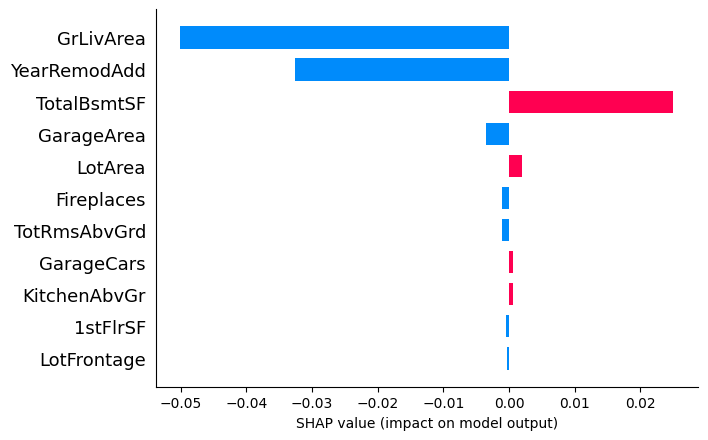

In [14]:
fiturname = ['LotFrontage','LotArea','TotalBsmtSF','1stFlrSF','GrLivArea','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','YearRemodAdd']
lin_reg_explainer1 = shap.LinearExplainer(reg1, x_train)

shap.bar_plot(lin_reg_explainer1.shap_values(x_validation[0]),
              feature_names=fiturname,
              max_display=len(fiturname))

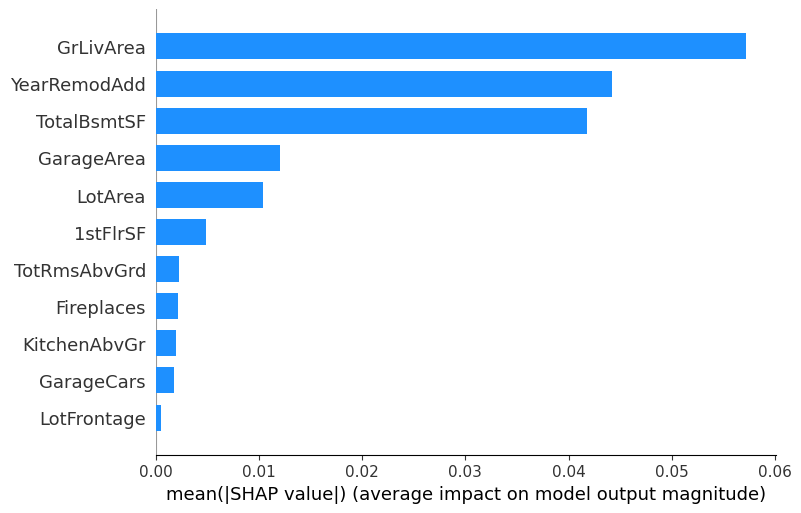

In [15]:
shap.summary_plot(lin_reg_explainer1.shap_values(x_validation),
                  feature_names=fiturname,
                  plot_type="bar",
                  color="dodgerblue"
                  )